<a href="https://colab.research.google.com/github/BANZOM/Stock_Market_Price_Prediction_by_LSTM/blob/main/stocks_market_prediction_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# downloading and importing libraries 

!pip install -q yfinance #Download market data from Yahoo! Finance's API
!pip install fix_yahoo_finance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# fundamental libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [21]:
# The tech stocks we'll use for this analysis 
# Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Start and end time for the data to be extracted 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
# DataFrame of the company 
print("Apple: \n",AAPL)
print("\nGoogle: \n",GOOG)
print("\nMicrosoft: \n",MSFT)
print("\nAmazon: \n",AMZN)

Apple: 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-08-30  149.000000  153.490005  148.610001  153.119995  152.266754   
2021-08-31  152.660004  152.800003  151.289993  151.830002  150.983963   
2021-09-01  152.830002  154.979996  152.339996  152.509995  151.660172   
2021-09-02  153.869995  154.720001  152.399994  153.649994  152.793808   
2021-09-03  153.759995  154.630005  153.089996  154.300003  153.440186   
...                ...         ...         ...         ...         ...   
2022-08-22  169.690002  169.860001  167.139999  167.570007  167.570007   
2022-08-23  167.080002  168.710007  166.649994  167.229996  167.229996   
2022-08-24  167.320007  168.110001  166.250000  167.529999  167.529999   
2022-08-25  168.779999  170.139999  168.350006  170.029999  170.029999   
2022-08-26  170.570007  171.050003  163.559998  163.619995  163.619995   

              Volume  
Date 

In [23]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-15,142.800003,143.759995,141.490005,143.179993,143.179993,39014600,AMAZON
2022-08-16,143.910004,146.570007,142.000000,144.779999,144.779999,59102900,AMAZON
2022-08-17,142.690002,143.380005,140.779999,142.100006,142.100006,48149800,AMAZON
2022-08-18,141.320007,142.770004,140.380005,142.300003,142.300003,37458700,AMAZON
2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47727300,AMAZON
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,AMAZON
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,AMAZON
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,AMAZON
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,AMAZON


In [24]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,157.993028,160.007650,156.179083,158.180797,157.684123,8.824087e+07
std,12.690973,12.690269,12.562582,12.613367,12.582541,2.645012e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.174995,149.434998,146.480003,148.294998,147.783249,6.946830e+07
50%,158.820007,161.020004,155.979996,158.520004,158.067886,8.250750e+07
75%,169.385002,171.065002,167.300003,169.060005,168.770233,1.003336e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [25]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-08-30 to 2022-08-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


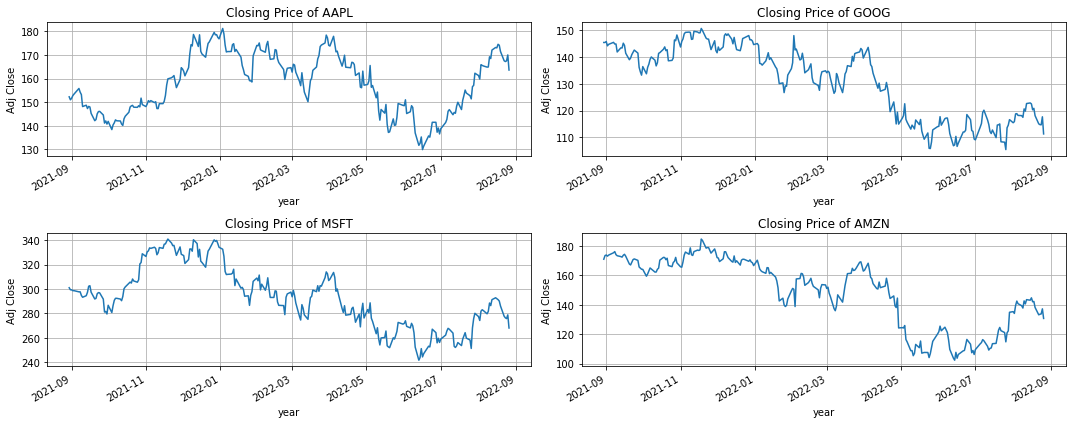

In [26]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.grid()
    plt.ylabel('Adj Close')
    plt.xlabel('year')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


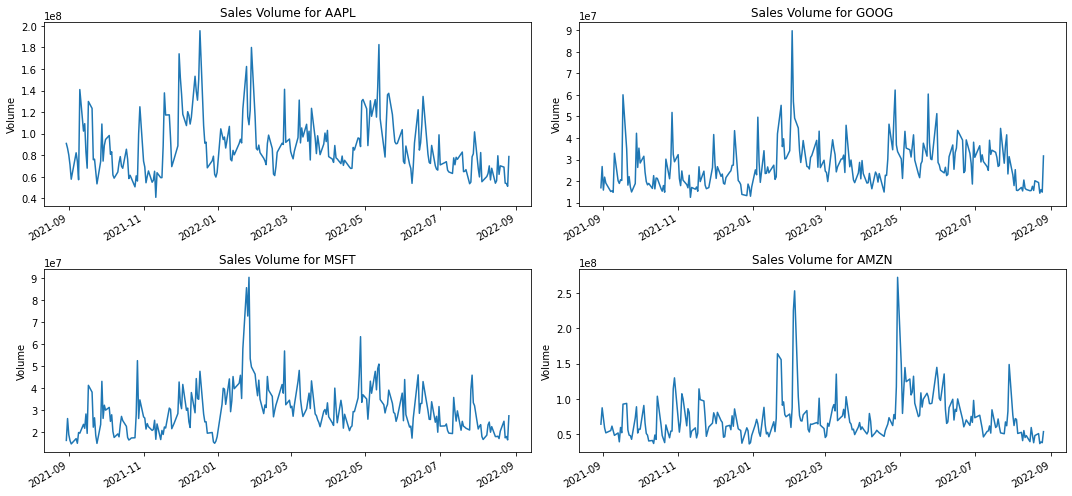

In [27]:
# Now lets plot the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

# The below function is used to fit the above given functions in the given region
plt.tight_layout()

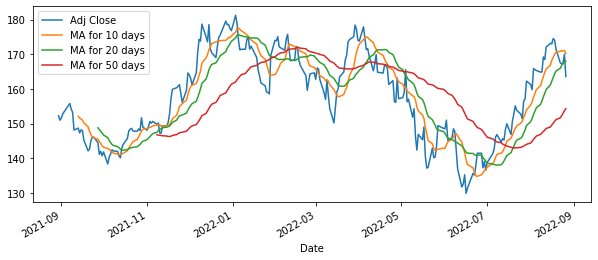

In [28]:
# for plotting rolling averages

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()


AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

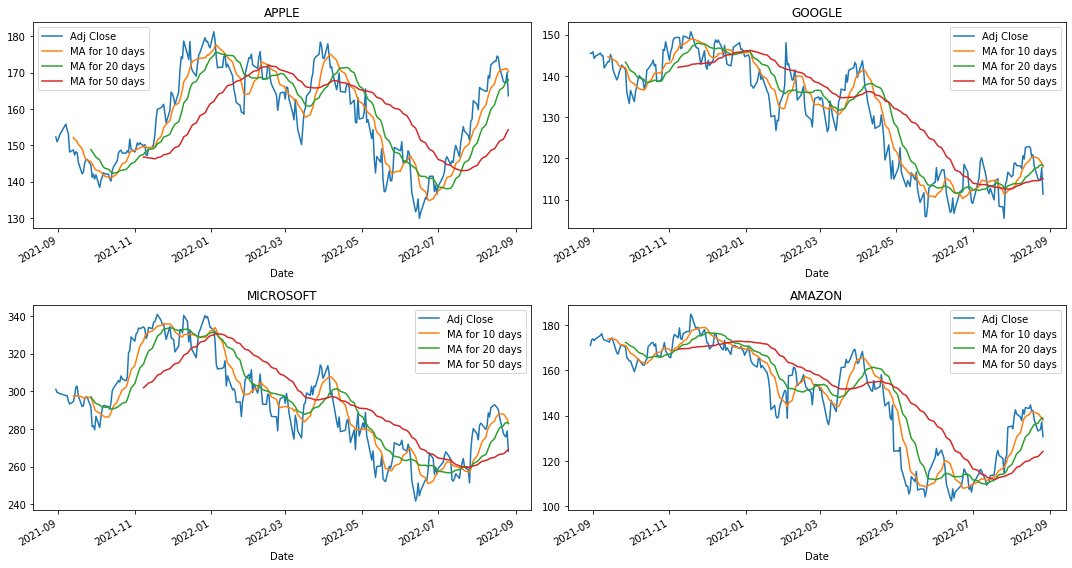

In [29]:
#Let's assume it as a coordinate axes

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

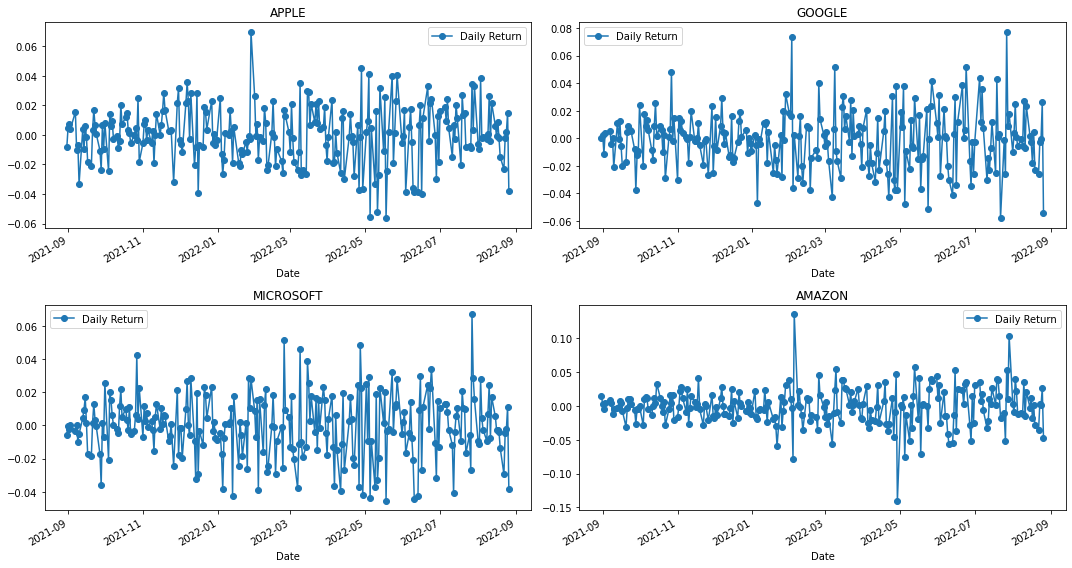

In [30]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

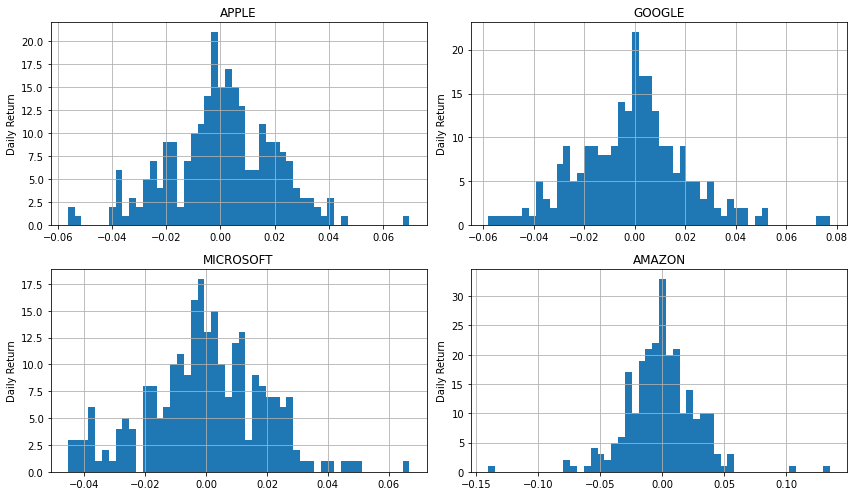

In [31]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [32]:

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GOOG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'MSFT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AMZN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: ignored